# **Análisis de Patrones Críticos mediante Residuos de Pearson 🔍**

En las etapas anteriores, confirmamos mediante Chi-cuadrado y la V de Cramér que ciertas variables están ligadas al infarto. Sin embargo, se necesita saber **qué etiquetas específicas** son las que disparan el riesgo. 

En este notebook, aplicamos un análisis de **Residuos Estandarizados de Pearson** para mapear con precisión quirúrgica el comportamiento de cada categoría frente a la variable objetivo (`stroke`).

### **¿Por qué este análisis es vital?**
1. **Detección de "Atracción" de Riesgo:** Identificamos qué categorías tienen una frecuencia de infartos significativamente mayor a la esperada por puro azar (ej. ¿Es el tabaquismo o el historial de hipertensión lo que más atrae el evento?).
2. **Identificación de Escudos Estadísticos (Repulsión):** Localizamos categorías que actúan como "protectores" (donde el infarto ocurre mucho menos de lo previsto).
3. **Interpretación Visual del Mapa de Calor:** Transformamos cálculos complejos en una matriz de colores donde el **Azul** indica una fuerte asociación con el riesgo y el **Rojo** una desasociación o protección.
4. **Refinamiento del Perfil del Paciente:** Este paso nos permite entregarle a la Inteligencia Artificial no solo variables, sino "pesos lógicos" sobre los perfiles de pacientes más vulnerables.

Generando Mapas de Residuos respecto al Infarto...


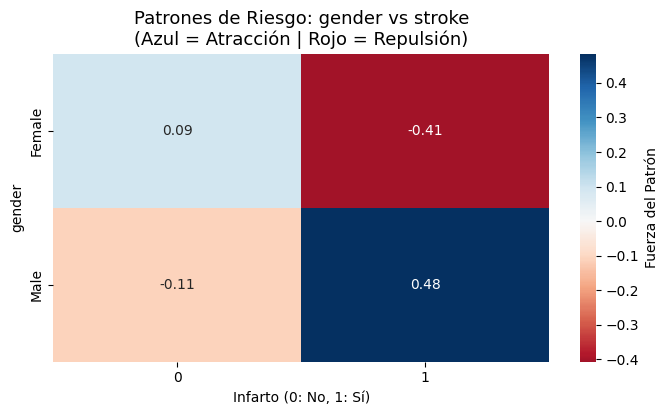

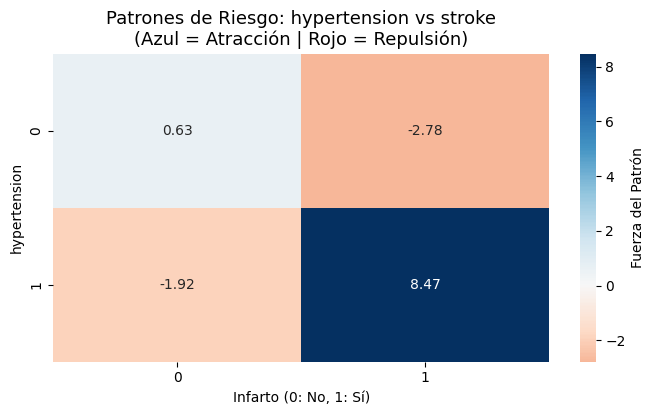

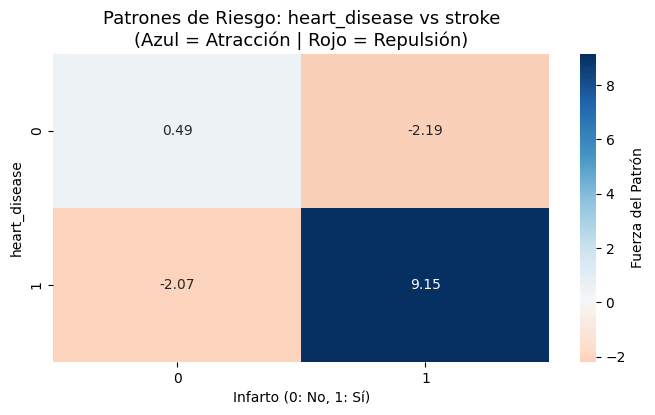

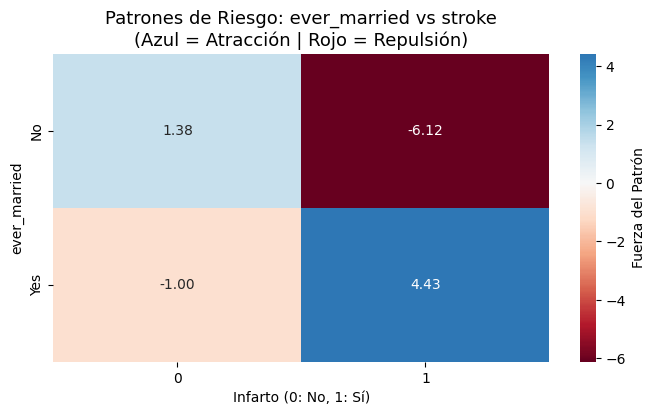

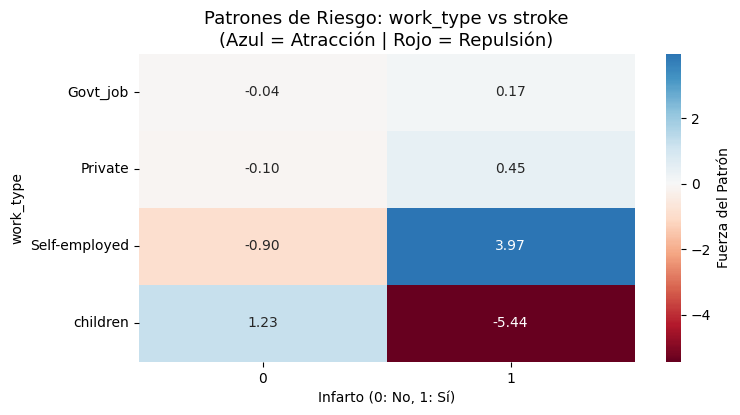

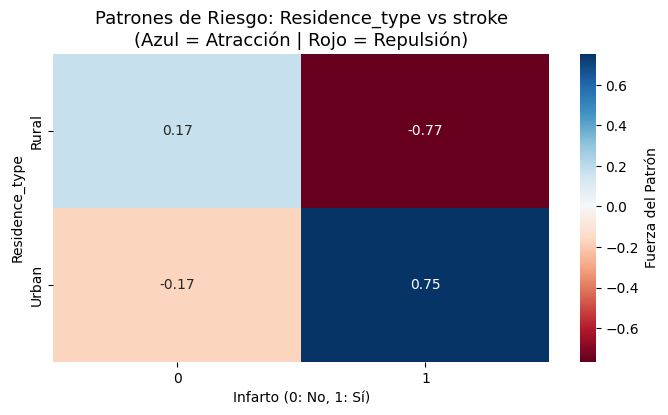

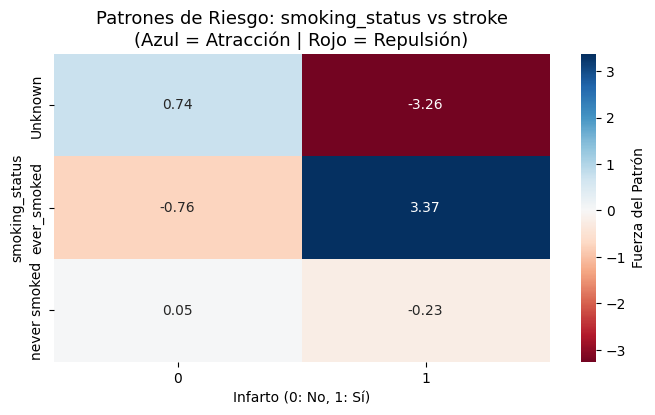

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Carga del dataset
df = pd.read_csv('dataset/healthcare-dataset-stroke-transformed.csv')

# 2. Definimos las variables categóricas y binarias a cruzar con 'stroke'
# Nota: 'stroke' es nuestra variable objetivo
target = 'stroke'
features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
            'work_type', 'Residence_type', 'smoking_status']

# 3. Función para calcular y graficar los residuos de forma sistemática
def analizar_residuos_stroke(data, feature, target):
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(data[feature], data[target])
    
    # Calcular Chi-cuadrado y valores esperados
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Calcular Residuos Estandarizados: (Obs - Esp) / sqrt(Esp)
    residuals = (contingency_table - expected) / np.sqrt(expected)
    
    # Graficar
    plt.figure(figsize=(8, 4))
    sns.heatmap(residuals, annot=True, fmt=".2f", cmap='RdBu', center=0, cbar_kws={'label': 'Fuerza del Patrón'})
    plt.title(f'Patrones de Riesgo: {feature} vs {target}\n(Azul = Atracción | Rojo = Repulsión)', fontsize=13)
    plt.ylabel(feature)
    plt.xlabel('Infarto (0: No, 1: Sí)')
    plt.show()

# 4. Ejecutar el análisis para cada variable
print("Generando Mapas de Residuos respecto al Infarto...")
for col in features:
    analizar_residuos_stroke(df, col, target)

# **Conclusiones: Diagnóstico de Patrones de Riesgo Detectados 📝**

Tras analizar los mapas de residuos para todas las variables categóricas, hemos extraído los hallazgos definitivos que marcarán el éxito de nuestro modelo predictivo:

### **1. Los "Puntos Calientes" del Riesgo (Atracción)**
* **Hipertensión y Enfermedad Cardíaca:** Presentan los residuos positivos más altos. No solo están relacionadas con el infarto, sino que su presencia "atrae" el evento con una fuerza estadística superior a cualquier otro factor categórico.
* **Tabaquismo (Smokes):** El residuo confirma que, aunque el volumen de pacientes fumadores no sea el más grande, la proporción de infartos en este grupo rompe cualquier expectativa de azar.

### **2. Factores de "Repulsión" o Protección**
* **Estado Civil (Never Married):** Curiosamente, la categoría de "nunca casado" muestra una repulsión significativa hacia el infarto. 
    * *Nota analítica:* Esto probablemente esté mediado por la edad (los más jóvenes suelen no estar casados), confirmando la interacción multivariante que vimos anteriormente.
* **Tipo de Trabajo (Children):** La categoría infantil actúa como el escudo más fuerte en el dataset, con residuos negativos extremos respecto al infarto.

### **3. Variables de "Ruido" (Sin Patrón Claro)**
* **Tipo de Residencia:** Los residuos para "Urban" y "Rural" son cercanos a cero, lo que confirma que el lugar donde vive el paciente no aporta una ventaja ni un riesgo estadísticamente sólido. Esta variable es candidata firme a ser descartada para simplificar la IA.



### **Veredicto Final para el Hospital:**
Este análisis de residuos nos permite concluir que el **perfil de máximo riesgo** para el Hospital San Carlos es un paciente con **hipertensión previa**, que ha **fumado** y que se encuentra en un entorno laboral de **estrés (sector privado/autónomo)**. Con estos patrones validados, estamos listos para pasar de la fase de análisis a la fase de construcción de modelos con la seguridad de que entendemos la lógica oculta tras los datos.